In [30]:
import numpy as np
import string
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [32]:
import seaborn as sns 
import matplotlib.pyplot as plt


In [3]:
df_train = pd.read_csv('qald-7-train.csv')
df_test = pd.read_csv('qald-7-test.csv')

In [4]:
df_train.head()

,questions,lang
0,When was the Battle of Gettysburg?,en
1,Quando foi a batalha de Gettysburg?,pt_BR
2,Wann fand die Schlacht von Gettysburg statt?,de
3,¿Cuándo tuvo lugar la batalla de Gettysburg?,es
4,Quando ha avuto luogo la battaglia di Gettysburg?,it


In [5]:
df_train.shape

(1983, 2)

In [6]:
df_test.head()

,questions,lang
0,Are there any castles in the United States?,en
1,NaN,fa
2,Gibt es irgendwelche Schlösser in den Vereinig...,de
3,NaN,es
4,Ci sono castelli negli Stati Uniti?,it


In [7]:
df_test=df_test.dropna(subset=['questions'])

In [8]:
df_test.shape

(172, 2)

In [9]:
df_train["lang"].unique()

array(['en', 'pt_BR', 'de', 'es', 'it', 'fr', 'nl', 'hi_IN', 'ro', 'fa'],
      dtype=object)

In [10]:
# English, German, Spanish, Italian, French, Dutch, Romanian
# {'en': 0, 'de': 1, 'es': 2, 'it': 3, 'fr': 4, 'nl': 5, 'ro': 6}

In [11]:
columns = ['pt_BR','hi_IN','fa']
for col in columns:
    df_train = df_train[df_train.lang!=col]
    df_test = df_test[df_test.lang!=col]

In [12]:
def preprocess(text):
        
    preprocessed_text = text.lower().replace('-', ' ')
    
    translation_table = str.maketrans('\n', ' ', string.punctuation+string.digits)
    
    preprocessed_text = preprocessed_text.translate(translation_table)
        
    return preprocessed_text

In [13]:
df_train['questions'] = [preprocess(text) for text in df_train['questions'].values]

In [14]:
df_test['questions'] = [preprocess(text) for text in df_test['questions'].values]

In [15]:
df_train.head()

,questions,lang
0,when was the battle of gettysburg,en
2,wann fand die schlacht von gettysburg statt,de
3,¿cuándo tuvo lugar la batalla de gettysburg,es
4,quando ha avuto luogo la battaglia di gettysburg,it
5,quand se déroula la bataille de gettysburg,fr


In [16]:
vectorizer = CountVectorizer()

In [17]:
X_train = vectorizer.fit_transform(df_train['questions'])
X_test = vectorizer.transform(df_test['questions'])

In [18]:
X_train

<1458x2694 sparse matrix of type '<class 'numpy.int64'>'
	with 10309 stored elements in Compressed Sparse Row format>

In [19]:
y_train = df_train['lang']
y_test = df_test['lang']

In [20]:
naive_classifier = MultinomialNB(fit_prior=False,alpha=0.01)
naive_classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.01, fit_prior=False)

In [21]:
predictions = naive_classifier.predict(X_test)

In [22]:
# 0.9880902922032959

In [28]:
accuracy_score(y_test, predictions)

0.9883720930232558

In [34]:
# y_train.unique()

array(['en', 'de', 'es', 'it', 'fr', 'nl', 'ro'], dtype=object)

In [35]:
# y_test.unique()

array(['en', 'de', 'it', 'fr'], dtype=object)

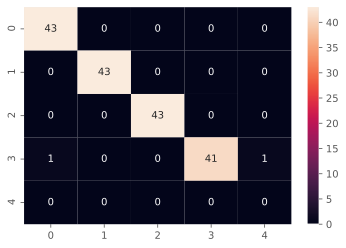

In [33]:
# cm = confusion_matrix(y_test,predictions)
# sns.heatmap(cm,annot=True,fmt="d");